In [1]:
import numpy as np
from sklearn.metrics import roc_curve
from scipy.interpolate import interp1d
from src.nflow_utils import *
import os
from matplotlib import colors
from src.utils import *
from src.nflow_utils import *
from src.generate_data_lhc import *
from src.utils import *
from src.flows import *
import pickle


In [2]:
cd ..

/scratch/rd804/m-anode


In [3]:

wandb_group_BDT = "BDT"
wandb_project_BDT = "IAD_weighted_80"
wandb_job_type_BDT = "sample"

wandb_group_BDT_50 = "BDT"
wandb_project_BDT_50 = "IAD_weighted_50"
wandb_job_type_BDT_50 = "sample"

wandb_group_ranode = "nflows_lhc_co_nsig_scan"
wandb_project_ranode = "r_anode_RQS_affine"
wandb_job_type_ranode = "try"

wandb_group_ranode_mass = "nflows_lhc_co_nsig_scan"
#wandb_project_ranode_mass = "r_anode_R_A_50"
#wandb_project_ranode_mass = "ra_uncond"
wandb_job_type_ranode_mass = "try"
wandb_project_ranode_mass = "ra_mass"
#wandb_job_type_ranode_mass = "try"

wandb_group_ranode_uncond = "nflows_lhc_co_nsig_scan"
wandb_project_ranode_uncond = "ra_mass_joint"
wandb_job_type_ranode_uncond = "try"


data_dir = "data/lhc_co"

mask = np.load(f'results/{wandb_group_BDT}/{wandb_project_BDT}_{1000}/{wandb_job_type_BDT}_{0}/mask_test.npy')
labels = np.load(f'{data_dir}/x_test.npy')[mask][:,-1]

#############################
CR_path = 'results/nflows_lhc_co/CR_bn_fixed_1000/try_1_0'
SR_data, CR_data , true_w, sigma = resample_split(data_dir, n_sig = 500, resample_seed = 1,resample = True)

with open(f'{CR_path}/pre_parameters.pkl', 'rb') as f:
    pre_parameters_CR = pickle.load(f)

pre_parameters_SR_ = preprocess_params_fit_all(SR_data)

pre_parameters_SR = pre_parameters_CR.copy()
for key in pre_parameters_CR.keys():
    pre_parameters_SR[key]= np.insert(pre_parameters_CR[key], 0, pre_parameters_SR_[key][0])
_x_test = np.load(f'{data_dir}/x_test.npy')
_, mask_CR = logit_transform(_x_test[:,1:-1], pre_parameters_CR['min'],
                                pre_parameters_CR['max'])
_, mask_SR = logit_transform(_x_test[:,:-1], pre_parameters_SR['min'],
                                pre_parameters_SR['max'])
mask_joint = mask_CR & mask_SR 
labels_joint = _x_test[mask_joint][:,-1]
#############################


nsigs = [75,150,225,300,450,500,600,1000]
#nsigs = [1000,600,500,450,300,225,150]
sigmas = [2.166,1.294,1.076,0.9714,0.6499,0.4866,0.3247]
nsigs = [1000,600,500,300]
#nsigs = [300]
#sigmas = [0.6499]
color = ['C0','C1','C2','C3','C4','C5','C6','C7']

#colors = []
_median_sic_IAD = []
_sic_min_IAD = []
_sic_max_IAD = []

_median_sic_IAD_50 = []
_sic_min_IAD_50 = []
_sic_max_IAD_50 = []

_median_sic_RANODE = []
_sic_min_RANODE = []
_sic_max_RANODE = []

_median_sic_RANODE_mass = []
_sic_min_RANODE_mass = []
_sic_max_RANODE_mass = []

_median_sic_RANODE_uncond = []
_sic_min_RANODE_uncond = []
_sic_max_RANODE_uncond = []



choosing random 500 signal events for mock_data from 70000 events
sigma=1.0736139182873174
true w: 0.003072474245436472


ensemble_S shape (20, 366131)
choosing random 1000 signal events for mock_data from 70000 events
sigma=2.1156509566250077
true w: 0.006036579872060546


/tmp/ipykernel_52385/933316955.py:98: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_cut, tpr_cut/np.sqrt(fpr_cut))


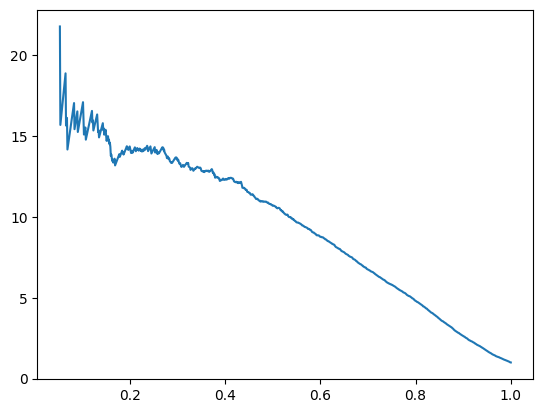

(10000,)


/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/scratch/rd804/m-anode/src/utils.py:218: RuntimeWarning: divide by zero encountered in true_divide
  sic_list = tpr_list/np.sqrt(fpr_list)


ensemble_S shape (20, 366131)
choosing random 600 signal events for mock_data from 70000 events
sigma=1.3003933288346383
true w: 0.0037190591519231557


/tmp/ipykernel_52385/933316955.py:98: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_cut, tpr_cut/np.sqrt(fpr_cut))


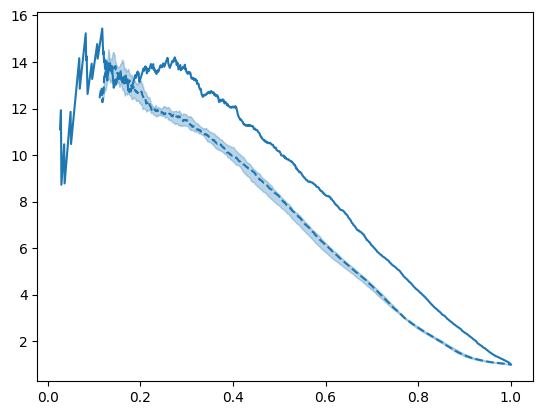

(10000,)


/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/scratch/rd804/m-anode/src/utils.py:218: RuntimeWarning: divide by zero encountered in true_divide
  sic_list = tpr_list/np.sqrt(fpr_list)


ensemble_S shape (20, 366131)
choosing random 500 signal events for mock_data from 70000 events
sigma=1.0736139182873174
true w: 0.003072474245436472


/tmp/ipykernel_52385/933316955.py:98: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_cut, tpr_cut/np.sqrt(fpr_cut))


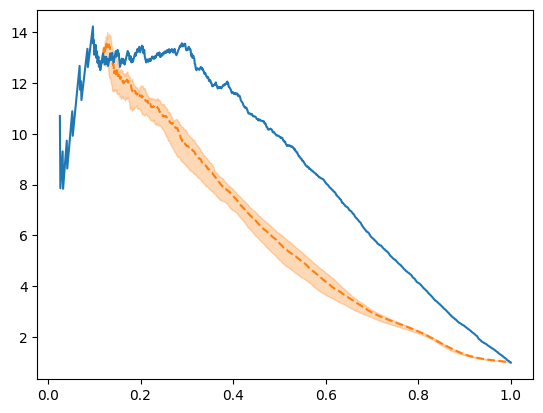

(10000,)


/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/scratch/rd804/m-anode/src/utils.py:218: RuntimeWarning: divide by zero encountered in true_divide
  sic_list = tpr_list/np.sqrt(fpr_list)


ensemble_S shape (20, 366131)
choosing random 300 signal events for mock_data from 70000 events
sigma=0.6458907262423701
true w: 0.001850678993559637


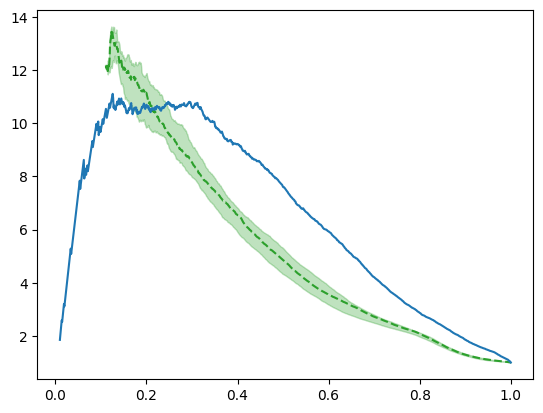

(10000,)


/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/rd804/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


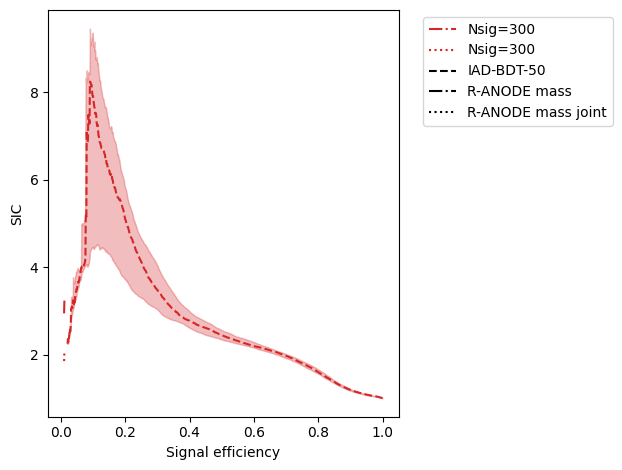

In [4]:

for k,nsig in enumerate(nsigs):
    
    tprs_BDT = []
    fprs_BDT = []
    
    tprs_BDT_50 = []
    fprs_BDT_50 = []
    
    tprs_ranode = []
    fprs_ranode = []

    tprs_ranode_mass = []
    fprs_ranode_mass = []

    tprs_ranode_uncond = []
    fprs_ranode_uncond = []

    tpr_interp = np.linspace(0.01, 1, 1000)

    # IAD
  #  for i in range(10):
   #     ypred = np.load(f'results/{wandb_group_BDT}/{wandb_project_BDT}_{nsig}/{wandb_job_type_BDT}_{i}/ypred.npy')

        #sic, tpr, max_sic = SIC_cut(labels, ypred)
    #    tpr_cut, fpr_cut = roc_interp(labels, ypred, tpr_interp)
     #   tprs_BDT.append(tpr_cut)
      #  fprs_BDT.append(fpr_cut)

        # IAD
    for i in range(10):
        ypred = np.load(f'results/{wandb_group_BDT_50}/{wandb_project_BDT_50}_{nsig}/{wandb_job_type_BDT_50}_{i}/ypred.npy')

        #sic, tpr, max_sic = SIC_cut(labels, ypred)
        tpr_cut, fpr_cut = roc_interp(labels, ypred, tpr_interp)
        tprs_BDT_50.append(tpr_cut)
        fprs_BDT_50.append(fpr_cut)
    
  #  for i in range(10):
   #     if i==0:
    #        ensemble_B = np.load(f'results/{wandb_group_ranode}/{wandb_project_ranode}_{nsig}/{wandb_job_type_ranode}_{i}_{0}/ensemble_B.npy')

     #   path_ensemble_S = f'results/{wandb_group_ranode}/{wandb_project_ranode}_{nsig}/{wandb_job_type_ranode}_{i}_'
        
     #   ensemble_S = [np.load(path_ensemble_S + f'{j}/ensemble_S.npy') for j in range(20) if os.path.exists(path_ensemble_S + f'{j}/ensemble_S.npy')]

      #  ensemble_S = np.array(ensemble_S)
        # print('ensemble_S shape', ensemble_S.shape)

     #   ensemble_S = np.mean(ensemble_S, axis=0)

     #   assert ensemble_B.shape == ensemble_S.shape

     #   ypred = np.log(ensemble_S+1e-32) - np.log(ensemble_B+1e-32)

      #  tpr_cut, fpr_cut = roc_interp(labels, ypred, tpr_interp)
      #  tprs_ranode.append(tpr_cut)
      #  fprs_ranode.append(fpr_cut)

    # Unconditional

    for i in range(1):
        if i==0:
          ensemble_B = np.load(f'results/{wandb_group_ranode_uncond}/{wandb_project_ranode_uncond}_{nsig}/{wandb_job_type_ranode_uncond}_{i}_{1}/ensemble_B.npy')
        path_ensemble_S = f'results/{wandb_group_ranode_uncond}/{wandb_project_ranode_uncond}_{nsig}/{wandb_job_type_ranode_uncond}_{i}_'

        ensemble_S = [np.load(path_ensemble_S + f'{j}/ensemble_S.npy') for j in range(20) if os.path.exists(path_ensemble_S + f'{j}/ensemble_S.npy')]
        ensemble_S = np.exp(np.array(ensemble_S))
        print('ensemble_S shape', ensemble_S.shape)
        ensemble_S = np.mean(ensemble_S, axis=0)
        assert ensemble_B.shape == ensemble_S.shape

        ypred = np.log(ensemble_S+1e-32) - np.log(ensemble_B+1e-32)
        SR_data, CR_data , true_w, sigma = resample_split(data_dir, n_sig = nsig, resample_seed = 1,resample = True)

        with open(f'{CR_path}/pre_parameters.pkl', 'rb') as f:
          pre_parameters_CR = pickle.load(f)

        pre_parameters_SR_ = preprocess_params_fit_all(SR_data)

        pre_parameters_SR = pre_parameters_CR.copy()
        for key in pre_parameters_CR.keys():
            pre_parameters_SR[key]= np.insert(pre_parameters_CR[key], 0, pre_parameters_SR_[key][0])
        _x_test = np.load(f'{data_dir}/x_test.npy')
        _, mask_CR = logit_transform(_x_test[:,1:-1], pre_parameters_CR['min'],
                                        pre_parameters_CR['max'])
        _, mask_SR = logit_transform(_x_test[:,:-1], pre_parameters_SR['min'],
                                        pre_parameters_SR['max'])
        mask_joint = mask_CR & mask_SR 
        labels_joint = _x_test[mask_joint][:,-1]

        mass = _x_test[mask_joint][:,0]
        mass_cut = (mass > 3.4) & (mass < 3.6)
        labels_joint = labels_joint[mass_cut]
        ypred = ypred[mass_cut]
        tpr_cut, fpr_cut = roc_interp(labels_joint, ypred, tpr_interp)
        tprs_ranode_uncond.append(tpr_cut)
        fprs_ranode_uncond.append(fpr_cut)
        plt.plot(tpr_cut, tpr_cut/np.sqrt(fpr_cut))
        plt.show()

    for i in range(1):
       # if i==0:
        ensemble_B = np.load(f'results/{wandb_group_ranode_mass}/{wandb_project_ranode_mass}_{nsig}/{wandb_job_type_ranode_mass}_{i}_{0}/ensemble_B.npy')
        path_ensemble_S = f'results/{wandb_group_ranode_mass}/{wandb_project_ranode_mass}_{nsig}/{wandb_job_type_ranode_mass}_{i}_'
 
        ensemble_S = [np.load(path_ensemble_S + f'{j}/ensemble_S.npy') for j in range(20) if os.path.exists(path_ensemble_S + f'{j}/ensemble_S.npy')]
        ensemble_S = np.array(ensemble_S)
        # print('ensemble_S shape', ensemble_S.shape)
        ensemble_S = np.mean(ensemble_S, axis=0)
        assert ensemble_B.shape == ensemble_S.shape

        ypred = np.log(ensemble_S+1e-32) - np.log(ensemble_B+1e-32)

        tpr_cut, fpr_cut = roc_interp(labels, ypred, tpr_interp)
        tprs_ranode_mass.append(tpr_cut)
        fprs_ranode_mass.append(fpr_cut)

    # print('tpr_cut shape', tpr_cut.shape)
    sic_median_BDT_50 , sic_max_BDT_50, sic_min_BDT_50, tpr_cut_BDT_50 = \
    ensembled_SIC(tprs_BDT_50, fprs_BDT_50)

    sic_median_ranode_mass, tpr_cut_ranode_mass = SIC_cut_(tprs_ranode_mass[0], fprs_ranode_mass[0])
    sic_median_ranode_uncond, tpr_cut_ranode_uncond = SIC_cut_(tprs_ranode_uncond[0], fprs_ranode_uncond[0])
  #  sic_median_BDT , sic_max_BDT, sic_min_BDT, tpr_cut_BDT = \
  #  ensembled_SIC(tprs_BDT, fprs_BDT)
  #  sic_median_ranode , sic_max_ranode, sic_min_ranode, tpr_cut_ranode = \
  #  ensembled_SIC(tprs_ranode, fprs_ranode)
  #  sic_median_ranode_mass , sic_max_ranode_mass, sic_min_ranode_mass, tpr_cut_ranode_mass = \
  #  ensembled_SIC(tprs_ranode_mass, fprs_ranode_mass)
  #  sic_median_ranode_uncond , sic_max_ranode_uncond, sic_min_ranode_uncond, tpr_cut_ranode_uncond = \
  #  ensembled_SIC(tprs_ranode_uncond, fprs_ranode_uncond)


  #  index_max = np.argmax(sic_median_BDT)
  #  _median_sic_IAD.append(sic_median_BDT[index_max])
  #  _sic_min_IAD.append(sic_min_BDT[index_max])
  #  _sic_max_IAD.append(sic_max_BDT[index_max])

   # index_max = np.argmax(sic_median_ranode)
   # _median_sic_RANODE.append(sic_median_ranode[index_max])
   # _sic_min_RANODE.append(sic_min_ranode[index_max])
   # _sic_max_RANODE.append(sic_max_ranode[index_max])

    index_max = np.argmax(sic_median_BDT_50)
    _median_sic_IAD_50.append(sic_median_BDT_50[index_max])
    _sic_min_IAD_50.append(sic_min_BDT_50[index_max])
    _sic_max_IAD_50.append(sic_max_BDT_50[index_max])

   # index = np.argmax(sic_median_ranode_mass)
   # _median_sic_RANODE_mass.append(sic_median_ranode_mass[index])
   # _sic_min_RANODE_mass.append(sic_min_ranode_mass[index])
   # _sic_max_RANODE_mass.append(sic_max_ranode_mass[index])

   # index = np.argmax(sic_median_ranode_uncond)
   # _median_sic_RANODE_uncond.append(sic_median_ranode_uncond[index])
   # _sic_min_RANODE_uncond.append(sic_min_ranode_uncond[index])
   # _sic_max_RANODE_uncond.append(sic_max_ranode_uncond[index])

    _median_sic_RANODE_mass.append(np.max(sic_median_ranode_mass))
    _median_sic_RANODE_uncond.append(np.max(sic_median_ranode_uncond))
    #_sic_min_RANODE_mass.append(sic_min_ranode_mass)

    plt.plot(tpr_cut_BDT_50, sic_median_BDT_50, linestyle='--',color=color[k])
    plt.fill_between(tpr_cut_BDT_50, sic_min_BDT_50, sic_max_BDT_50, alpha=0.3, color=color[k])

   # plt.plot(tpr_cut_ranode, sic_median_ranode, label=f'Nsig={nsig}',linestyle='-', color=color[k])
   # plt.fill_between(tpr_cut_ranode, sic_min_ranode, sic_max_ranode, alpha=0.3, color=color[k])

    plt.plot(tpr_cut_ranode_mass, sic_median_ranode_mass, label=f'Nsig={nsig}', color=color[k], linestyle='-.')
    plt.plot(tpr_cut_ranode_uncond, sic_median_ranode_uncond, label=f'Nsig={nsig}', color=color[k], linestyle=':')

    #plt.plot(tpr_cut, sic_median, label=f'Nsig={nsig}', linestyle='--')
    #plt.fill_between(tpr_cut, sic_min, sic_max, alpha=0.3)


#plt.plot(tpr_cut_BDT, tpr_cut_BDT**0.5, color='black',label='')
#plt.plot([],[], ls = '-', label='R-ANODE',color='black')
plt.plot([],[], ls = '--', label='IAD-BDT-50',color='black')
plt.plot([],[], ls = '-.', label='R-ANODE mass',color='black')
plt.plot([],[], ls = ':', label='R-ANODE mass joint',color='black')

plt.xlabel('Signal efficiency')
plt.ylabel('SIC')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
#plt.colorbar()
#plt.savefig('SIC_curves_Ranode_BDT_joint.png')
plt.show()


_median_sic_IAD = np.array(_median_sic_IAD)
_sic_max_IAD = np.array(_sic_max_IAD)
_sic_min_IAD = np.array(_sic_min_IAD)

#print(_sic_max_IAD - _sic_min_IAD)

_median_sic_IAD_50 = np.array(_median_sic_IAD_50)
_sic_max_IAD_50 = np.array(_sic_max_IAD_50)
_sic_min_IAD_50 = np.array(_sic_min_IAD_50)

#print(_sic_max_IAD_50 - _sic_min_IAD_50)

_median_sic_RANODE = np.array(_median_sic_RANODE)
_sic_max_RANODE = np.array(_sic_max_RANODE)
_sic_min_RANODE = np.array(_sic_min_RANODE)

_median_sic_RANODE_mass = np.array(_median_sic_RANODE_mass)
#_sic_max_RANODE_mass = np.array(_sic_max_RANODE_mass)
#_sic_min_RANODE_mass = np.array(_sic_min_RANODE_mass)

_median_sic_RANODE_uncond = np.array(_median_sic_RANODE_uncond)
#_sic_max_RANODE_uncond = np.array(_sic_max_RANODE_uncond)
#_sic_min_RANODE_uncond = np.array(_sic_min_RANODE_uncond)



In [ ]:
wandb_group_ranode_uncond = "nflows_lhc_co_nsig_scan"
wandb_project_ranode_uncond = "ra_mass_joint"
wandb_job_type_ranode_uncond = "try"

In [6]:
_median_sic_RANODE_mass

array([       inf,        inf,        inf, 3.23324805])

In [8]:
_median_sic_RANODE_uncond

array([inf, inf, inf, inf])

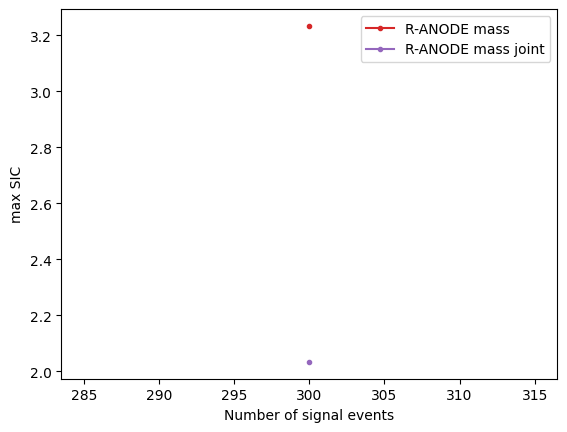

In [5]:

#plt.plot(nsigs, _median_sic_IAD_50, marker=".", label='IAD-BDT 50', color='C0')
#plt.errorbar(nsigs, _median_sic_IAD_50, yerr=(_median_sic_IAD_50 - _sic_max_IAD_50,
 #                                             _sic_min_IAD_50 - _median_sic_IAD_50 ), fmt='none', capsize=3, color='C0')
#plt.fill_between(nsigs, _sic_min_IAD_50, _sic_max_IAD_50, alpha=0.3)

#plt.plot(nsigs, _median_sic_RANODE, marker=".", label='R-ANODE', color='C1')
#plt.errorbar(nsigs, _median_sic_RANODE, yerr=( _median_sic_RANODE - _sic_max_RANODE,
 #                                             _sic_min_RANODE - _median_sic_RANODE ), \
  #           fmt='none', capsize=3, color='C1')
#plt.fill_between(nsigs, _sic_min_RANODE, _sic_max_RANODE, alpha=0.3)

#plt.plot(nsigs, _median_sic_IAD, marker=".", label='IAD-BDT 80',color='C2')
#plt.errorbar(nsigs, _median_sic_IAD, yerr=(_median_sic_IAD-_sic_max_IAD,
 #                                          _sic_min_IAD-_median_sic_IAD), fmt='none', capsize=3, color='C2')
#plt.fill_between(nsigs, _sic_min_IAD, _sic_max_IAD, alpha=0.3)

plt.plot(nsigs, _median_sic_RANODE_mass, marker=".", label='R-ANODE mass', color='C3')
#plt.errorbar(nsigs, _median_sic_RANODE_mass, yerr=(_median_sic_RANODE_mass-_sic_max_RANODE_mass,
 #                                                  _sic_min_RANODE_mass-_median_sic_RANODE_mass), fmt='none', capsize=3, color='C3')
plt.plot(nsigs, _median_sic_RANODE_uncond, marker=".", label='R-ANODE mass joint', color='C4')
plt.xlabel('Number of signal events')
plt.ylabel('max SIC')
plt.legend()
plt.savefig('SIC_vs_nsig_Ranode_BDT_joint.png')
plt.show()



In [ ]:

sigma = np.array(sigmas)
#_median_sic_IAD = np.array(_median_sic_IAD) * sigma
#_sic_max_IAD = np.array(_sic_max_IAD) * sigma
#_sic_min_IAD = np.array(_sic_min_IAD) * sigma

_median_sic_IAD_50 = np.array(_median_sic_IAD_50) * sigma
_sic_min_IAD_50 = np.array(_sic_min_IAD_50) * sigma
_sic_max_IAD_50 = np.array(_sic_max_IAD_50) * sigma

_median_sic_RANODE = np.array(_median_sic_RANODE) * sigma
_sic_min_RANODE = np.array(_sic_min_RANODE) * sigma
_sic_max_RANODE = np.array(_sic_max_RANODE) * sigma

_median_sic_RANODE_mass = np.array(_median_sic_RANODE_mass) * sigma
_sic_min_RANODE_mass = np.array(_sic_min_RANODE_mass) * sigma
_sic_max_RANODE_mass = np.array(_sic_max_RANODE_mass) * sigma

_median_sic_RANODE_uncond = np.array(_median_sic_RANODE_uncond) * sigma
_sic_min_RANODE_uncond = np.array(_sic_min_RANODE_uncond) * sigma
_sic_max_RANODE_uncond = np.array(_sic_max_RANODE_uncond) * sigma

plt.plot(nsigs, _median_sic_IAD_50, marker=".", label='IAD-BDT 50')
plt.fill_between(nsigs, _sic_min_IAD_50, _sic_max_IAD_50, alpha=0.3)
plt.plot(nsigs, _median_sic_RANODE, marker=".", label='R-ANODE 80')
plt.fill_between(nsigs, _sic_min_RANODE, _sic_max_RANODE, alpha=0.3)
#plt.plot(nsigs, _median_sic_IAD, marker=".", label='IAD-BDT 80')
#plt.fill_between(nsigs, _sic_min_IAD, _sic_max_IAD, alpha=0.3)
plt.plot(nsigs, sigmas, marker=".", label='sigma')
plt.plot(nsigs, _median_sic_RANODE_mass, marker=".", label='R-ANODE mass')
plt.plot(nsigs, _median_sic_RANODE_uncond, marker=".", label='R-ANODE mass joint')

plt.axhline(5, ls='--', color='black')
plt.axhline(3, ls='--', color='black')
plt.xlabel('Number of signal events')
plt.ylabel('significance')
plt.legend()
plt.xlim(150,400)
plt.ylim(0,15)
plt.savefig('Significance_vs_nsig_Ranode_BDT_joint.png')
plt.close()



   
